From the data provided on Hollywood movies:
1. Find the highest-rated movie in the “Quest” story type.
2. Find the genre in which there has been the greatest number of movie releases
3. Print the names of the top five movies with the costliest budgets.
4. Is there any correspondence between the critics’ evaluation of a movie and its
acceptance by the public? Find out, by plotting the net profitability of a movie
against the ratings it receives on Rotten Tomatoes.

In [1]:
import pandas as pd
df_movie = pd.read_csv('HollywoodMovies.csv')
df_movie.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


In [2]:
m_quest = df_movie[df_movie['Story'] == 'Quest']

In [3]:
# Find the highest-rated movie in the “Quest” story type.

m_quest[m_quest.RottenTomatoes == m_quest['RottenTomatoes'].max()]

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
343,The Hurt Locker,Independent,97.0,83.0,Quest,Drama,4.0,0.14,36338.0,17.01,32.21,49.22,15.0,328.13,0.93,2009
629,The Muppets,Disney,97.0,87.0,Quest,Comedy,3440.0,29.24,8500.0,88.63,76.55,165.18,45.0,367.08,64.98,2011


In [4]:
# Find the genre in which there has been the greatest number of movie releases

df_movie.groupby('Genre')['Movie'].count().sort_values(ascending=False)

Genre
Comedy         177
Action         166
Drama          109
Horror          52
Animation       51
Thriller        35
Adventure       30
Romance         20
Crime           15
Biography       14
Documentary      7
Fantasy          6
Mystery          5
Musical          4
Name: Movie, dtype: int64

In [5]:
# Print the names of the top five movies with the costliest budgets.

import numpy as np

df_budget = pd.pivot_table(df_movie, ['Budget'], ['Movie'],aggfunc=np.max)
df_budget.sort_values(by='Budget', ascending=False)[:5]

,Budget
Movie,
Pirates of the Caribbean: At World's End,300.0
Tangled,260.0
Spider-Man 3,258.0
John Carter,250.0
Pirates of the Caribbean:On Stranger Tides,250.0


<Axes: >

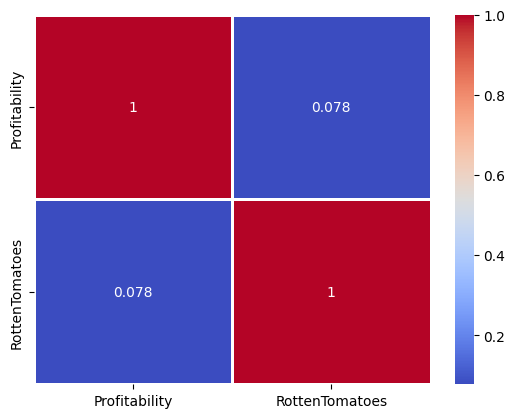

In [6]:
# Is there any correspondence between the critics’ evaluation of a movie and its acceptance by the public?
# Find out, by plotting the net profitability of a movie against the ratings it receives on Rotten Tomatoes.

import seaborn as sns
%matplotlib inline

df_corr = df_movie[['Profitability', 'RottenTomatoes']].corr()
sns.heatmap(df_corr, annot=True,cmap='coolwarm',linecolor='white',linewidth=1)

5. Perform Operations on Files

5.1: From the raw data below create a data frame
'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
'age': [42, 52, 36, 24, 73],
'preTestScore': [4, 24, 31, ".", "."],
'postTestScore': ["25,000", "94,000", 57, 62, 70]

5.2: Save the dataframe into a CSV file as example.csv

5.3: Read the example.csv and print the data frame

5.4: Read the example.csv without the column heading

Question 5: Read the example.csv and make the index columns 'First Name’ and
'Last Name

5.6: Print the data frame in a Boolean form as True or False. True for Null/ NaN
values and false for non-null values

5.7: Read the dataframe by skipping the first 3 rows and print the data frame

5.8: Load a CSV file while interpreting "," in strings around numbers as thousands
of separators. Check the raw data 'postTestScore' column has, as thousands
separator. A comma should be ignored while reading the data. It is the default behavior, but you need to give an argument to the read_csv function which makes
sure commas are ignored.

In [7]:
data = {
    'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
    'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
    'female': [0, 1, 1, 0, 1],'age': [42, 52, 36, 24, 73],
    'preTestScore': [4, 24, 31, 2, 3],
    'postTestScore': [25, 94, 57, 62, 70]
}
df = pd.DataFrame(data)
df

,first_name,last_name,female,age,preTestScore,postTestScore
0,Jason,Miller,0,42,4,25
1,Molly,Jacobson,1,52,24,94
2,Tina,Ali,1,36,31,57
3,Jake,Milner,0,24,2,62
4,Amy,Cooze,1,73,3,70


In [8]:
df.to_csv('example.csv')

In [9]:
df1 = pd.read_csv('example.csv', header=None)
df1.head()

,0,1,2,3,4,5,6
0,NaN,first_name,last_name,female,age,preTestScore,postTestScore
1,0.0,Jason,Miller,0,42,4,25
2,1.0,Molly,Jacobson,1,52,24,94
3,2.0,Tina,Ali,1,36,31,57
4,3.0,Jake,Milner,0,24,2,62


In [10]:
df.isna()

,first_name,last_name,female,age,preTestScore,postTestScore
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [11]:
df2 = pd.read_csv('example.csv', skiprows =3)
df2.head()

,2,Tina,Ali,1,36,31,57
0,3,Jake,Milner,0,24,2,62
1,4,Amy,Cooze,1,73,3,70


In [12]:
df3 = pd.read_csv('example.csv', thousands=r',')
df3.head()

,Unnamed: 0,first_name,last_name,female,age,preTestScore,postTestScore
0,0,Jason,Miller,0,42,4,25
1,1,Molly,Jacobson,1,52,24,94
2,2,Tina,Ali,1,36,31,57
3,3,Jake,Milner,0,24,2,62
4,4,Amy,Cooze,1,73,3,70


6.1: From the raw data below create a Pandas Series
'Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'
a) Print all elements in lower case
b) Print all the elements in upper case
c) Print the length of all the elements

In [13]:
lst = ['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat']
s1 = pd.Series(lst)
print("Upper", '\n', s1.str.upper())
print("\nLower", '\n', s1.str.lower())
print("\nLength - ", len(s1))

Upper 
 0    AMIT
1     BOB
2    KATE
3       A
4       B
5     NaN
6     CAR
7     DOG
8     CAT
dtype: object

Lower 
 0    amit
1     bob
2    kate
3       a
4       b
5     NaN
6     car
7     dog
8     cat
dtype: object

Length -  9


6.2: From the raw data below create a Pandas Series
' Atul', 'John ', ' jack ', 'Sam'
a) Print all elements after stripping spaces from the left and right
b) Print all the elements after removing spaces from the left only
c) Print all the elements after removing spaces from the right only

In [14]:
lst = [' Atul', 'John ', ' jack ', 'Sam']
s2 = pd.Series(lst)
print("Stripped", '\n', s2.str.strip())
print("\nLeft Stripped", '\n', s2.str.lstrip())
print("\nRight Stripped", '\n', s2.str.rstrip())

Stripped 
 0    Atul
1    John
2    jack
3     Sam
dtype: object

Left Stripped 
 0     Atul
1    John 
2    jack 
3      Sam
dtype: object

Right Stripped 
 0     Atul
1     John
2     jack
3      Sam
dtype: object


6.3: - Create a series from the raw data below
'India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'
a) split the individual strings wherever ‘_’ comes and create a list out of it.
b) Access the individual elements of a list
c) Expand the elements so that all individual elements get split by ‘_’ and instead
of list returns individual elements

In [15]:
lst = ['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture']
s3 = pd.Series(lst)
s4 = s3.str.split('_')
s4

0           [India, is, big]
1     [Population, is, huge]
2                        NaN
3    [Has, diverse, culture]
dtype: object

In [16]:
s4[0][0]

'India'

6.4: Create a series and replace either X or dog with XX-XX

'A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat

In [17]:
lst = ['A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat']
s5 = pd.Series(lst)
s5 = s5.str.replace('X', 'XX-XXX')
s5 = s5.str.replace('dog', 'XX-XXX')
s5

0            A
1            B
2            C
3    AabXX-XXX
4    BacXX-XXX
5             
6          NaN
7         CABA
8       XX-XXX
9          cat
dtype: object

6.5: Create a series and remove the dollars from the numeric values
`'12', '-$10', '$10,000'`

In [18]:
lst = ['12', '-$10', '$10,000']
s6 = pd.Series(lst)
s6 = s6.str.replace('$', '')
s6

0        12
1       -10
2    10,000
dtype: object

6.6:- Create a series and reverse all lower case words
'India 1998', 'big country', np.nan

In [19]:
lst = ['India 1998', 'big country', np.nan]
s7 = pd.Series(lst)
s8 = s7.apply(lambda x: x[::-1] if type(x) == str and x.islower() else x)
s8

0     India 1998
1    yrtnuoc gib
2            NaN
dtype: object

6.7: Create pandas series and print true if the value is alphanumeric in series or false
if the value is not alphanumeric in series.

'1', '2', '1a', '2b', '2003c

In [20]:
lst = ['1', '2', '1a', '2b', '2003c']
s9 = pd.Series(lst)
s9.apply(lambda x: x.isalnum())

0    True
1    True
2    True
3    True
4    True
dtype: bool

6.8: Create pandas series and print true if the value is containing ‘A’

'1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c'

In [22]:
lst = ['1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c']
s10 = pd.Series(lst)
s10.apply(lambda x: 'A' in x)

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool

6.9: Create pandas series and print in three columns value 0 or 1 is a or b or c exists
in values

'a', 'a|b', np.nan, 'a|c'

In [23]:
lst = ['a', 'a|b', np.nan, 'a|c']
s11 = pd.Series(lst)
s11.apply(lambda x: 1 if x in ['a','b','c'] else 0)

0    1
1    0
2    0
3    0
dtype: int64